# K-Means Clustering

In [1]:
# from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.cluster import KMeans

from time import time

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt; 
plt.rcdefaults()

# Data from Preprocessing Result

In [2]:
data = pd.read_csv('./data/preprocessing_data.csv')
data.head()

,username,date,time,text,tweetID,placeID,daerah,lokasi,longitude,latitude,result
0,@AbdulIkromMukti,2018-01-01,17:22,Ntah ini gaya apa. Nahan bersin Nahan mules M...,9.477750e+17,2eb44917f4d6dddc,Cirebon Barat,Cirebon Barat Indonesia,108.539152,-6.719110,ntah gaya nahan bersin nahan mules muka kane m...
1,@nengnurlaela21,2018-01-01,18:36,get well soon Kak Dori masih di Sukabumi ka...,9.477940e+17,8b2c9342507e86d3,Baros,Baros Indonesia,106.928706,-6.946683,get well soon kak dor sukabumi kak niat ken sa...
2,@_sulistiyowati_,2018-01-01,19:57,Awalnya pening doang berhari-hari. Terus dema...,9.478140e+17,dc83e4ea9c950d75,Labuhan Maringgai,Labuhan Maringgai Indonesia,105.811806,-5.342388,pening doang hari demam diare lemes kapar
3,@rundraj,2018-01-01,13:39,Sing seneng akeh sing mules merga mburi ngom...,9.477190e+17,c4397d8c10325af5,Kasihan,Kasihan Indonesia,110.333619,-7.814739,sing neng akeh sing mules merga mburi ngomah k...
4,@fitryfee3,2018-01-01,11:55,Maag kumat sejak kemarin hasilnya diare. Mul...,9.476930e+17,420f122b6bea262c,Lemahabang,Lemahabang Indonesia,107.184287,-6.297686,maag kumat kemarin hasil diare mules plus my p...


In [130]:
def wm2df(wm, feat_names):
    
    # create an index for each row
    doc_names = ['Doc{:d}'.format(idx) for idx, _ in enumerate(wm)]
    df = pd.DataFrame(data=wm.toarray(), index=doc_names,
                      columns=feat_names)
    return(df)

# set of documents
corpora = data.loc[:,'result'].tolist()

# instantiate the vectorizer object
cvec = CountVectorizer(lowercase=False)

# convert the documents into a document-term matrix
wm = cvec.fit_transform(corpora)

# retrieve the terms found in the corpora
tokens = cvec.get_feature_names()

# create a dataframe from the matrix
tdm = wm2df(wm, tokens)

In [131]:
tdm.shape

(6787, 12205)

In [132]:
new_tdm = tdm.sum(0).to_frame('freq')
new_tdm[new_tdm['freq'] == 85]

,freq
angin,85
at,85
kasih,85


# K-Means Clustering with Tfidf Vectorizer

In [124]:
range_cluster = 11
wcss = []
for cluster in range(2, range_cluster):
    print("Cluster " + str(cluster))
    print('#######################################################################')
    print("Extracting features from the training dataset using a sparse vectorizer")
    t0 = time()
    vectorizer = TfidfVectorizer(max_df=0.5, max_features=100, min_df=85, use_idf=True)
    X = vectorizer.fit_transform(corpora)

    print("done in %fs" % (time() - t0))
    print("n_samples: %d, n_features: %d" % X.shape)
    print()

    km = KMeans(n_clusters=cluster, init='k-means++', max_iter=100, n_init=1, verbose=False)

    print("Clustering sparse data with %s" % km)
    t0 = time()
    km.fit(X)
    wcss.append(km.inertia_)
    print("done in %0.3fs" % (time() - t0))
    print()

    print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, km.labels_, sample_size=1000))

    print()

    print("Top terms per cluster:")
    order_centroids = km.cluster_centers_.argsort()[:, ::-1]

    terms = vectorizer.get_feature_names()
    for i in range(cluster):
        print("Cluster %d:" % i, end='')
        for ind in order_centroids[i, :10]:
            print(' %s' % terms[ind], end='')
        print()
    print()

Cluster 2
#######################################################################
Extracting features from the training dataset using a sparse vectorizer


NameError: name 'TfidfVectorizer' is not defined

In [5]:
tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
tfidf.shape

(6787, 84)

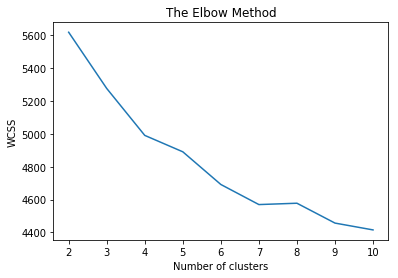

In [6]:
plt.plot(range(2, range_cluster), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# K-Means Clustering with CountVectorizer

In [144]:
range_cluster = 11
wcss = []
for cluster in range(2, range_cluster):
    print("Cluster " + str(cluster))
    print('#######################################################################')
    print("Extracting features from the training dataset using a sparse vectorizer")
    t0 = time()
    vectorizer = CountVectorizer(max_df=0.5, max_features=100, min_df=85)
#     vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(corpora)

    print("done in %fs" % (time() - t0))
    print("n_samples: %d, n_features: %d" % X.shape)
    print()

    km = KMeans(n_clusters=cluster, init='k-means++', max_iter=100, n_init=1, verbose=False)

    print("Clustering sparse data with %s" % km)
    t0 = time()
    km.fit(X)
    wcss.append(km.inertia_)
    print("done in %0.3fs" % (time() - t0))
    print()

    print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, km.labels_, sample_size=1000))

    print()

    print("Top terms per cluster:")
    order_centroids = km.cluster_centers_.argsort()[:, ::-1]

    terms = vectorizer.get_feature_names()
    for i in range(cluster):
        print("Cluster %s:" % str(i+2), end='')
        for ind in order_centroids[i, :15]:
            print(' %s' % terms[ind], end='')
        print()
    print()

Cluster 2
#######################################################################
Extracting features from the training dataset using a sparse vectorizer
done in 0.139938s
n_samples: 6787, n_features: 84

Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=2, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=False)
done in 0.077s

Silhouette Coefficient: 0.099

Top terms per cluster:
Cluster 2: mules perut sakit makan mencret yg ga ya pagi udah kalo bikin aja gak jam
Cluster 3: diare makan sakit yg obat ya ga aja udah kalo perut gak minum pagi kena

Cluster 3
#######################################################################
Extracting features from the training dataset using a sparse vectorizer
done in 0.126930s
n_samples: 6787, n_features: 84

Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=3, n_init=1, n_jobs=1, 

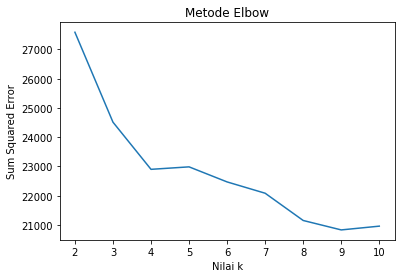

In [145]:
plt.plot(range(2, range_cluster), wcss)
plt.title('Metode Elbow')
plt.xlabel('Nilai k')
plt.ylabel('Sum Squared Error')
plt.show()

In [7]:
cluster = 3
wcss = []
print("Cluster " + str(cluster))
print('#######################################################################')
print("Extracting features from the training dataset using a sparse vectorizer")
t0 = time()
vectorizer = CountVectorizer(max_df=0.5, max_features=100, min_df=85)
X = vectorizer.fit_transform(corpora)

print("done in %fs" % (time() - t0))
print("n_samples: %d, n_features: %d" % X.shape)
print()

km = KMeans(n_clusters=cluster, init='k-means++', max_iter=100, n_init=1, verbose=False)

print("Clustering sparse data with %s" % km)
t0 = time()
km.fit(X)
wcss.append(km.inertia_)
print("done in %0.3fs" % (time() - t0))
print()

print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, km.labels_, sample_size=1000))

print()

print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]

terms = vectorizer.get_feature_names()
for i in range(cluster):
    print("Cluster %s:" % str(i+2), end='')
    for ind in order_centroids[i, :15]:
        print(' %s' % terms[ind], end='')
    print()
print()

Cluster 3
#######################################################################
Extracting features from the training dataset using a sparse vectorizer
done in 0.172904s
n_samples: 6787, n_features: 84

Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=3, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=False)
done in 0.239s

Silhouette Coefficient: 0.171

Top terms per cluster:
Cluster 2: mules diare mencret perut yg ga ya pagi udah kalo bikin aja gak minum pas
Cluster 3: makan mules perut diare pedes ga aja sakit mencret yg udah ya pagi gak kalo
Cluster 4: sakit perut yg makan ga ya bikin kalo aja udah gak sampe pagi diare gue



In [7]:
cluster_result = []
for r in data['result']:
    cluster_result.append(km.predict(vectorizer.transform([r]))[0])

In [9]:
data['cluster_result'] = cluster_result
data.head()

,username,date,time,text,tweetID,placeID,daerah,lokasi,longitude,latitude,result,cluster_result
0,@AbdulIkromMukti,2018-01-01,17:22,Ntah ini gaya apa. Nahan bersin Nahan mules M...,9.477750e+17,2eb44917f4d6dddc,Cirebon Barat,Cirebon Barat Indonesia,108.539152,-6.719110,ntah gaya nahan bersin nahan mules muka kane m...,1
1,@nengnurlaela21,2018-01-01,18:36,get well soon Kak Dori masih di Sukabumi ka...,9.477940e+17,8b2c9342507e86d3,Baros,Baros Indonesia,106.928706,-6.946683,get well soon kak dor sukabumi kak niat ken sa...,0
2,@_sulistiyowati_,2018-01-01,19:57,Awalnya pening doang berhari-hari. Terus dema...,9.478140e+17,dc83e4ea9c950d75,Labuhan Maringgai,Labuhan Maringgai Indonesia,105.811806,-5.342388,pening doang hari demam diare lemes kapar,2
3,@rundraj,2018-01-01,13:39,Sing seneng akeh sing mules merga mburi ngom...,9.477190e+17,c4397d8c10325af5,Kasihan,Kasihan Indonesia,110.333619,-7.814739,sing neng akeh sing mules merga mburi ngomah k...,1
4,@fitryfee3,2018-01-01,11:55,Maag kumat sejak kemarin hasilnya diare. Mul...,9.476930e+17,420f122b6bea262c,Lemahabang,Lemahabang Indonesia,107.184287,-6.297686,maag kumat kemarin hasil diare mules plus my p...,1


In [10]:
data.to_csv('./clustering_result.csv')